In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [44]:
data=pd.read_csv('/content/mission1.csv')

In [45]:
data.head(10)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,Male,High School,Standard,NaN,10,7,88,94,72
1,Male,High School,Standard,NaN,1,3,67,80,95
2,Male,Bachelor,Free/Reduced,NaN,1,6,84,100,76
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64
4,Female,Associate,Free/Reduced,NaN,2,0,72,92,99
5,Male,Master,Standard,NaN,7,2,84,75,61
6,Female,Bachelor,Standard,NaN,4,1,86,64,93
7,Male,Bachelor,Standard,Completed,7,3,98,96,68
8,Female,Some College,Standard,Completed,6,2,66,94,81
9,Female,Some College,Standard,Completed,6,2,66,94,81


In [46]:
data.isnull().sum()
data.drop_duplicates(inplace=True)

In [47]:
data["Test Preparation Course"]=data["Test Preparation Course"].fillna("unCompleted")

In [79]:
le=LabelEncoder()
data["Test Preparation Course"]=le.fit_transform(data["Test Preparation Course"])
data["Lunch Type"]=le.fit_transform(data["Lunch Type"])
data["Gender"]=le.fit_transform(data["Gender"])
data["Parental Education Level"]=le.fit_transform(data["Parental Education Level"])


In [80]:
mn=MinMaxScaler()
data["Study Time"]=mn.fit_transform(data[["Study Time"]])
data["Absences"]=mn.fit_transform(data[["Absences"]])
data["Math Score"]=mn.fit_transform(data[["Math Score"]])
data["Reading Score"]=mn.fit_transform(data[["Reading Score"]])
data["Writing Score"]=mn.fit_transform(data[["Writing Score"]])


In [50]:
data.corr()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
Gender,1.000000,-0.127196,0.125809,0.101226,0.120680,0.149392,0.014248,-0.078102,0.158505
Parental Education Level,-0.127196,1.000000,-0.063189,-0.088329,-0.099894,-0.042461,-0.009186,0.135249,-0.170049
Lunch Type,0.125809,-0.063189,1.000000,0.155729,0.065908,0.050477,-0.030741,0.090363,0.222691
Test Preparation Course,0.101226,-0.088329,0.155729,1.000000,-0.088149,0.017832,0.011625,-0.061919,0.091675
Study Time,0.120680,-0.099894,0.065908,-0.088149,1.000000,0.110486,-0.038316,0.017448,-0.102173
Absences,0.149392,-0.042461,0.050477,0.017832,0.110486,1.000000,0.014253,-0.091829,0.058257
Math Score,0.014248,-0.009186,-0.030741,0.011625,-0.038316,0.014253,1.000000,0.078773,-0.040784
Reading Score,-0.078102,0.135249,0.090363,-0.061919,0.017448,-0.091829,0.078773,1.000000,-0.000772
Writing Score,0.158505,-0.170049,0.222691,0.091675,-0.102173,0.058257,-0.040784,-0.000772,1.000000


In [51]:
data["exams score"]=data["Math Score"]+data["Reading Score"]+data["Writing Score"]


In [52]:
data.describe()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score,exams score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.560000,1.900000,0.480000,0.420000,0.497778,0.479000,0.522250,0.490500,0.485250,1.498000
std,0.498888,1.337116,0.502117,0.496045,0.337785,0.322019,0.289895,0.296311,0.287538,0.510999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325000
25%,0.000000,1.000000,0.000000,0.000000,0.222222,0.200000,0.275000,0.243750,0.250000,1.050000
50%,1.000000,2.000000,0.000000,0.000000,0.500000,0.400000,0.525000,0.487500,0.500000,1.550000
75%,1.000000,3.000000,1.000000,1.000000,0.777778,0.800000,0.756250,0.756250,0.725000,1.925000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.600000


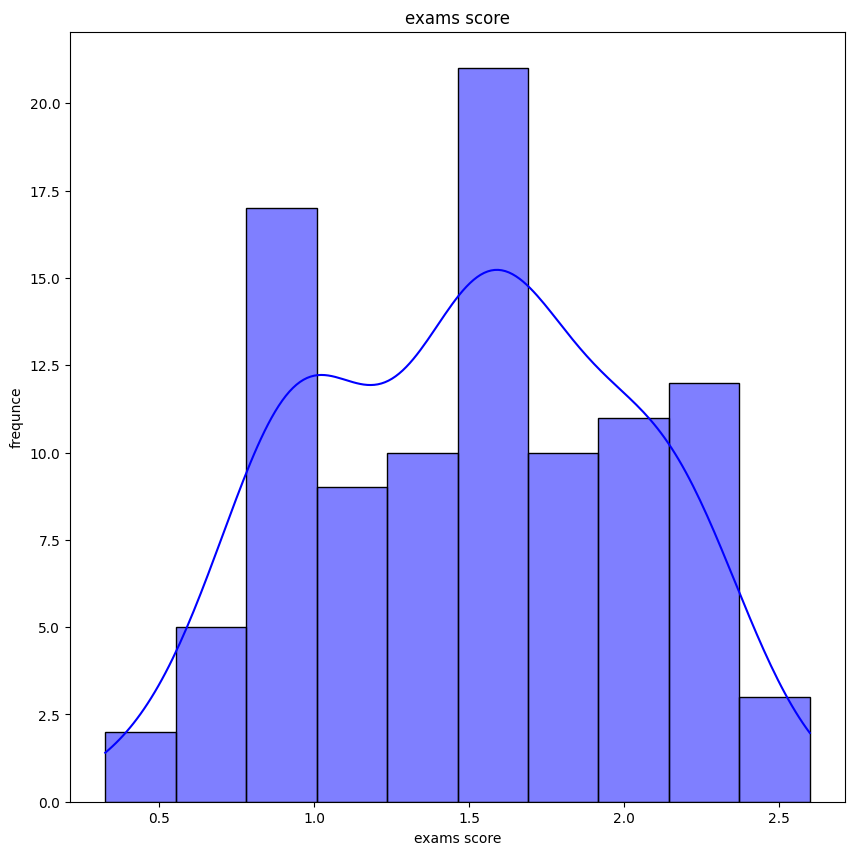

In [53]:
plt.figure(figsize=(10,10))
sns.histplot(data["exams score"],kde=True,bins=10,color="Blue")
plt.title("exams score")
plt.xlabel("exams score")
plt.ylabel("frequnce")
plt.show()

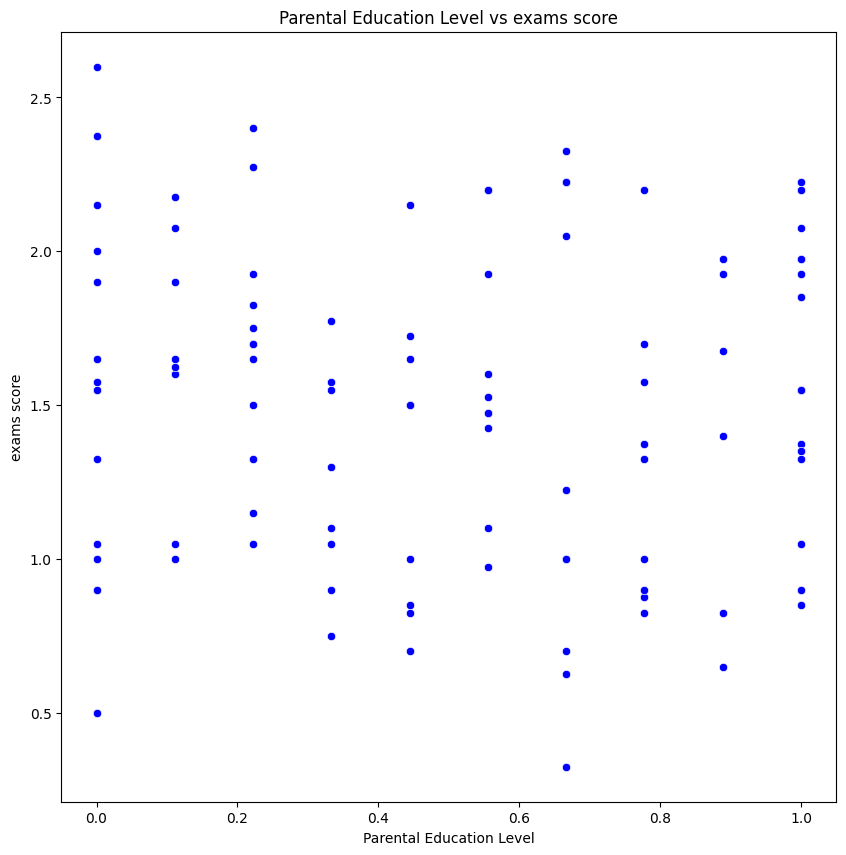

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Study Time",y="exams score",data=data,color="Blue")
plt.title("Parental Education Level vs exams score")
plt.xlabel("Parental Education Level")
plt.ylabel("exams score")
plt.show()

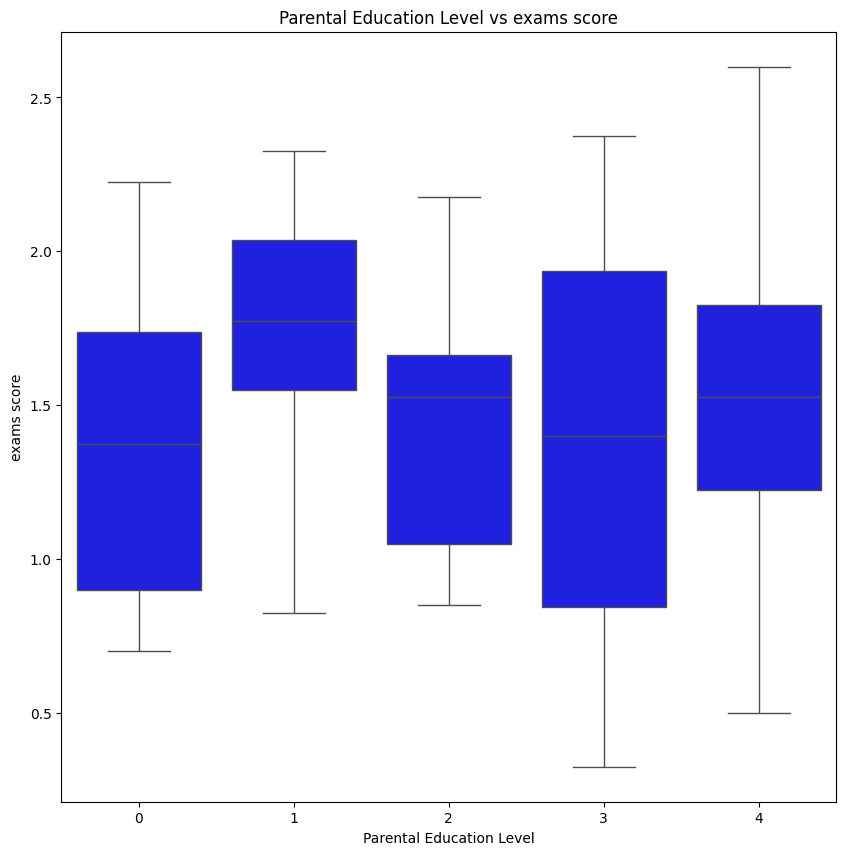

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Parental Education Level",y="exams score",data=data,color="Blue")
plt.title("Parental Education Level vs exams score")
plt.xlabel("Parental Education Level")
plt.ylabel("exams score")
plt.show()

In [56]:
x=data.drop(["exams score"],axis=1)
y=data["exams score"]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [58]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
y_test_pred=rf.predict(x_test)

In [60]:
print("the acuurce RandomForestRegressor :",r2_score(y_test,y_test_pred)*100)
print("the acuurce mean_squared_error :",mean_absolute_error(y_test,y_test_pred)*100)

the acuurce RandomForestRegressor : 91.02073671073371
the acuurce mean_squared_error : 10.408750000000042


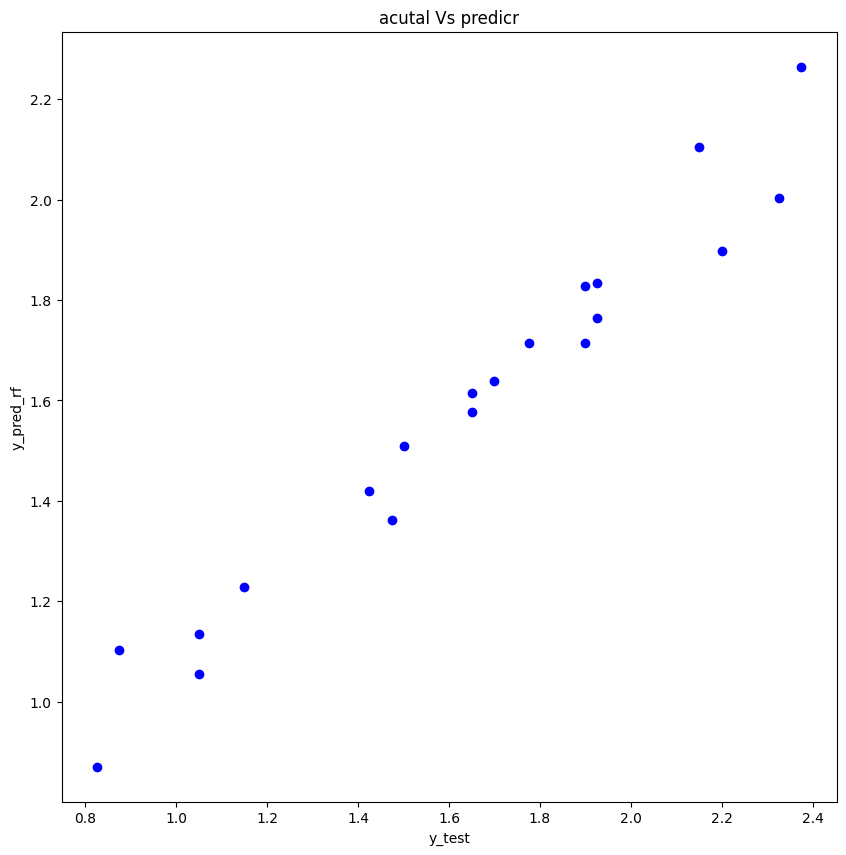

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_test_pred,color="Blue")
plt.title("acutal Vs predicr")
plt.xlabel("y_test")
plt.ylabel("y_pred_rf")
plt.show()

**Gride Search** , *Random Search*

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
rf_prams={"n_estimators":[50,100,200,None],"max_depth":[10,3,5,None]}
Randomized_model=RandomizedSearchCV(RandomForestRegressor(),rf_prams,cv=5)
Randomized_model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 3, 5, None],
                                        'n_estimators': [50, 100, 200, None]})

In [64]:
print("prams for high accurce is :",Randomized_model.best_params_)

prams for high accurce is : {'n_estimators': 100, 'max_depth': 10}


In [65]:
print("prams for high accurce is :",Randomized_model.best_score_)

prams for high accurce is : 0.8721720220914018


**Grdio Dypolyment**

In [82]:
import gradio as gr
le = LabelEncoder()
mn = MinMaxScaler()
def prediction(Gender, MathScore, ReadingScore, WritingScore,TestPreparatioCours,LunchType,ParentalEducationLevel,StudyTime,Absences):
    try:
        input = pd.DataFrame({
            "Gender": [Gender],
            "Math Score": [MathScore],
            "Reading Score": [ReadingScore],
            "Writing Score": [WritingScore],
            "Test Preparation Course": [TestPreparatioCours],
            "Lunch Type":[LunchType],
            "Parental Education Level":[ParentalEducationLevel],
            "Study Time":[StudyTime],
            "Absences":[Absences]

        })
        input["Math Score"] = mn.transform(input[["Math Score"]])
        input["Reading Score"] = mn.transform(input[["Reading Score"]])
        input["Writing Score"] = mn.transform(input[["Writing Score"]])
        input["Gender"] = le.transform(input["Gender"])
        input["Test Preparation Course"] = le.transform(input["Test Preparation Course"])
        input["Lunch Type"] = le.transform(input["Lunch Type"])
        input["Parental Education Level"] = le.transform(input["Parental Education Level"])
        input["Study Time"] = mn.transform(input[["Study Time"]])
        input["Absences"] = mn.transform(input[["Absences"]])


        predicT = rf.predict(input)
        return predicT[0]
    except Exception as e:
        return str(e)

gr.Interface(
    fn=prediction,
    inputs=[
        gr.Dropdown(choices=["male", "female"], label="Gender"),
        gr.Number(label="Math Score"),
        gr.Number(label="Reading Score"),
        gr.Number(label="Writing Score"),
        gr.Dropdown(choices=["completed", "unCompleted"], label="Test Preparation Course"),
        gr.Dropdown(choices=["standard", "free/reduced"], label="Lunch Type"),
        gr.Dropdown(choices=["high school", "some high school", "some college", "associate's degree", "bachelor's degree", "master's degree"], label="Parental Education Level"),
        gr.Number(label="Study Time"),
        gr.Number(label="Absences"),

    ],
    outputs=gr.Number(label="exams score"),
    title="Score Prediction"
).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://93c43ed17e30d2ee61.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
